In [1]:
# Import all the necessary packages.
%reset -f
from __future__ import print_function
from datetime import datetime
# General packages 
import pandas as pd
import numpy as np
# Packages for Plotting Graphs 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For the model we will mostly import functions from scikit-learn
from sklearn.model_selection import KFold, train_test_split, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')


## Load the Dataset and Combine

#### Loading 2019 Dataset for American Community Survey (ACS) 5-Year Estimates 

In [2]:
# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# Load the data
acs2019 = pd.read_excel('ACSST5Y2019.S1701-2024-11-18T185757.xlsx', 'Data', index_col=False)

# pull only the county name 
acs_col_names = [x for x in acs2019.columns if 'Unnamed' not in x]

# set row 0 as column names
acs2019.columns = acs2019.iloc[0].fillna(' ')

# set column 0 as index
acs2019.set_index(acs2019.columns[0], inplace=True)

# only keep columns with Poverty Rate data
acs2019 = acs2019.loc[:, acs2019.columns.str.contains('Percent')]

# set county names as column names
acs2019.columns = acs_col_names

# remove the first two rows
acs2019 = acs2019.iloc[2:, :]

# remove rows with NaN
acs2019 = acs2019.dropna()

# convert all text to float
acs2019 = acs2019.applymap(lambda x: float(x.strip('%')) / 100 if x.endswith('%') else np.nan)

# remove unnecessary data
acs2019 = acs2019.drop(acs2019.index[4:22])
acs2019 = acs2019.iloc[:11,:]

# remove unnecesary words from column heading to match county names in the PRI table
acs2019.columns = acs2019.columns.str.replace(r' County, California$', '', regex=True).str.replace('California', 'Statewide', regex=False)
acs2019.head(20)

,Statewide,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,0.13,0.10,0.20,0.10,0.19,0.11,0.13,0.09,0.20,0.08,...,0.09,0.15,0.15,0.22,0.19,0.24,0.13,0.09,0.19,0.15
Under 18 years,0.18,0.11,0.27,0.14,0.20,0.20,0.19,0.11,0.26,0.10,...,0.11,0.20,0.21,0.33,0.26,0.32,0.14,0.12,0.16,0.19
Under 5 years,0.19,0.11,0.48,0.08,0.22,0.14,0.20,0.12,0.21,0.09,...,0.10,0.22,0.23,0.34,0.39,0.32,0.15,0.12,0.14,0.20
5 to 17 years,0.18,0.11,0.22,0.16,0.19,0.21,0.19,0.11,0.27,0.10,...,0.11,0.20,0.21,0.33,0.21,0.31,0.14,0.12,0.16,0.18
Less than high school graduate,0.22,0.19,0.46,0.13,0.25,0.18,0.12,0.18,0.26,0.16,...,0.17,0.22,0.23,0.25,0.38,0.33,0.21,0.15,0.21,0.26
High school graduate (includes equivalency),0.14,0.11,0.18,0.11,0.17,0.12,0.11,0.11,0.19,0.10,...,0.11,0.13,0.14,0.21,0.16,0.21,0.15,0.10,0.13,0.13
"Some college, associate's degree",0.10,0.09,0.18,0.08,0.15,0.09,0.12,0.07,0.15,0.08,...,0.08,0.10,0.09,0.17,0.18,0.12,0.13,0.06,0.11,0.13
Bachelor's degree or higher,0.05,0.04,0.01,0.07,0.07,0.04,0.03,0.03,0.05,0.04,...,0.04,0.05,0.06,0.05,0.06,0.05,0.04,0.03,0.06,0.05
Civilian labor force 16 years and over,0.07,0.05,0.19,0.06,0.15,0.05,0.06,0.05,0.11,0.05,...,0.06,0.09,0.09,0.14,0.13,0.15,0.09,0.05,0.12,0.09


#### Loading 2020 Dataset for American Community Survey (ACS) 5-Year Estimates 

In [3]:
# Load the data
acs2020 = pd.read_excel('ACSST5Y2020.S1701-2024-11-18T185806.xlsx', 'Data', index_col=False)

# pull only the county name 
acs_col_names = [x for x in acs2020.columns if 'Unnamed' not in x]

# set row 0 as column names
acs2020.columns = acs2020.iloc[0].fillna(' ')

# set column 0 as index
acs2020.set_index(acs2020.columns[0], inplace=True)

# only keep columns with Poverty Rate data
acs2020 = acs2020.loc[:, acs2020.columns.str.contains('Percent')]

# set county names as column names
acs2020.columns = acs_col_names

# remove the first two rows
acs2020 = acs2020.iloc[2:, :]

# remove rows with NaN
acs2020 = acs2020.dropna()

# convert all text to float
acs2020 = acs2020.applymap(lambda x: float(x.strip('%')) / 100 if x.endswith('%') else np.nan)

# remove unnecessary data
acs2020 = acs2020.drop(acs2020.index[4:22])
acs2020 = acs2020.iloc[:11,:]

# remove unnecesary words from column heading to match county names in the PRI table
acs2020.columns = acs2020.columns.str.replace(r' County, California$', '', regex=True).str.replace('California', 'Statewide', regex=False)
acs2020.head(20)

,Statewide,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,0.13,0.09,0.12,0.08,0.18,0.11,0.12,0.08,0.17,0.09,...,0.09,0.14,0.13,0.19,0.23,0.22,0.11,0.09,0.19,0.15
Under 18 years,0.17,0.10,0.18,0.10,0.19,0.17,0.16,0.10,0.23,0.10,...,0.10,0.18,0.18,0.27,0.30,0.29,0.11,0.12,0.14,0.18
Under 5 years,0.17,0.10,0.25,0.04,0.22,0.09,0.14,0.11,0.15,0.10,...,0.11,0.19,0.17,0.28,0.43,0.30,0.13,0.11,0.13,0.22
5 to 17 years,0.17,0.10,0.16,0.12,0.18,0.20,0.17,0.10,0.25,0.09,...,0.10,0.17,0.18,0.27,0.25,0.29,0.10,0.13,0.15,0.16
Less than high school graduate,0.21,0.18,0.44,0.14,0.25,0.22,0.12,0.17,0.22,0.14,...,0.17,0.20,0.20,0.26,0.41,0.31,0.18,0.15,0.18,0.22
High school graduate (includes equivalency),0.13,0.11,0.13,0.10,0.17,0.10,0.11,0.11,0.17,0.12,...,0.10,0.13,0.13,0.19,0.18,0.18,0.14,0.10,0.14,0.15
"Some college, associate's degree",0.09,0.09,0.10,0.07,0.15,0.09,0.12,0.07,0.12,0.08,...,0.07,0.09,0.09,0.14,0.22,0.12,0.12,0.06,0.12,0.13
Bachelor's degree or higher,0.05,0.04,0.02,0.05,0.06,0.04,0.03,0.03,0.06,0.04,...,0.04,0.04,0.04,0.06,0.13,0.04,0.04,0.04,0.05,0.04
Civilian labor force 16 years and over,0.07,0.05,0.10,0.04,0.13,0.06,0.05,0.05,0.07,0.05,...,0.05,0.07,0.06,0.11,0.14,0.13,0.07,0.05,0.12,0.08


#### Loading 2021 Dataset for American Community Survey (ACS) 5-Year Estimates 

In [4]:
# Load the data
acs2021 = pd.read_excel('ACSST5Y2021.S1701-2024-11-18T185811.xlsx', 'Data', index_col=False)

# pull only the county name 
acs_col_names = [x for x in acs2021.columns if 'Unnamed' not in x]

# set row 0 as column names
acs2021.columns = acs2021.iloc[0].fillna(' ')

# set column 0 as index
acs2021.set_index(acs2021.columns[0], inplace=True)

# only keep columns with Poverty Rate data
acs2021 = acs2021.loc[:, acs2021.columns.str.contains('Percent')]

# set county names as column names
acs2021.columns = acs_col_names

# remove the first two rows
acs2021 = acs2021.iloc[2:, :]

# remove rows with NaN
acs2021 = acs2021.dropna()

# convert all text to float
acs2021 = acs2021.applymap(lambda x: float(x.strip('%')) / 100 if x.endswith('%') else np.nan)

# remove unnecessary data
acs2021 = acs2021.drop(acs2021.index[4:22])
acs2021 = acs2021.iloc[:11,:]

# remove unnecesary words from column heading to match county names in the PRI table
acs2021.columns = acs2021.columns.str.replace(r' County, California$', '', regex=True).str.replace('California', 'Statewide', regex=False)
acs2021.head(11)


,Statewide,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,0.12,0.09,0.13,0.08,0.18,0.14,0.13,0.08,0.17,0.09,...,0.09,0.14,0.13,0.18,0.23,0.20,0.10,0.09,0.17,0.15
Under 18 years,0.16,0.09,0.17,0.07,0.18,0.22,0.19,0.10,0.25,0.11,...,0.10,0.18,0.17,0.26,0.28,0.26,0.08,0.12,0.13,0.18
Under 5 years,0.16,0.09,0.18,0.04,0.20,0.10,0.17,0.12,0.16,0.12,...,0.10,0.19,0.18,0.28,0.28,0.28,0.07,0.11,0.11,0.20
5 to 17 years,0.16,0.10,0.17,0.08,0.17,0.27,0.19,0.10,0.28,0.11,...,0.11,0.18,0.16,0.26,0.28,0.26,0.09,0.13,0.13,0.17
Less than high school graduate,0.20,0.18,0.29,0.11,0.24,0.31,0.14,0.16,0.21,0.17,...,0.17,0.20,0.19,0.26,0.33,0.28,0.20,0.14,0.18,0.20
High school graduate (includes equivalency),0.13,0.11,0.19,0.11,0.17,0.15,0.11,0.10,0.15,0.10,...,0.10,0.13,0.13,0.17,0.28,0.17,0.14,0.10,0.13,0.14
"Some college, associate's degree",0.09,0.09,0.11,0.08,0.15,0.09,0.11,0.08,0.12,0.09,...,0.07,0.09,0.09,0.13,0.18,0.11,0.10,0.07,0.11,0.14
Bachelor's degree or higher,0.05,0.04,0.01,0.04,0.06,0.08,0.05,0.04,0.08,0.04,...,0.04,0.04,0.05,0.07,0.04,0.04,0.04,0.04,0.05,0.03
Civilian labor force 16 years and over,0.07,0.05,0.11,0.03,0.13,0.07,0.06,0.04,0.07,0.05,...,0.05,0.07,0.07,0.10,0.10,0.12,0.07,0.05,0.11,0.09


#### Loading CalFresh Program Reach Index (PRI) Data Set. Sourced from the California Department of Social Services, this dataset reports the percentage of eligible residents in each county who received CalFresh benefits.

In [5]:
# Load the data
pri = pd.read_excel('Master data PUBLIC ACCESSIBLE.xlsx', 'PRI', index_col=False)

# set column 0 as index
#pri.set_index(pri.columns[0], inplace=True)
# set row 1 as column names
pri.columns = pri.iloc[0].fillna(' ')
# remove the first row and index name
pri = pri.iloc[1:, :]
pri.index.name = None
# set row 1 as column names
#pri.columns = pri.iloc[0].fillna(' ')
pri.reset_index(inplace=True)
# only keep columns with PRI data
pri = pri[['Calendar Year', 'PRI Excludes SSI (SSI Removed From the Calculation)','County','County Center X','County Center Y']]

pri = pri.rename(columns={'Calendar Year':'year','County Center X':'longitude','County Center Y':'latitude','PRI Excludes SSI (SSI Removed From the Calculation)':'PRI'})
pri = pri.set_index('County')
pri.head()

,year,PRI,longitude,latitude
County,,,,
Statewide,2014,0.63,NaN,NaN
Alameda,2014,0.59,-121.79,37.68
Alpine,2014,0.80,-120.04,38.63
Amador,2014,0.66,-120.24,38.46
Butte,2014,0.57,-121.57,39.72


## Review the Data & Pre-process if required

#### Plotting County wise density map for PRI entry

In [6]:
fig = px.density_mapbox(pri, lat='latitude', lon='longitude',
                        z='PRI', radius=15,
                        center=dict(lat=pri.latitude.mean(), 
                                    lon=pri.longitude.mean()), 
                        zoom=5,
                        mapbox_style="open-street-map", 
                        height=800)
fig.update_geos(visible=False)
fig.show()

In [7]:
# only keep columns with PRI data
pri = pri[['year', 'PRI']]
pri.index.name = None
pri.shape


(472, 2)

In [8]:
pri.head(10)

,year,PRI
Statewide,2014,0.63
Alameda,2014,0.59
Alpine,2014,0.80
Amador,2014,0.66
Butte,2014,0.57
Calaveras,2014,0.80
Colusa,2014,0.39
Contra Costa,2014,0.57
Del Norte,2014,0.92
El Dorado,2014,0.46


### Generate co-relation Matrix for ACS data

In [9]:
acs2021

,Statewide,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,0.12,0.09,0.13,0.08,0.18,0.14,0.13,0.08,0.17,0.09,...,0.09,0.14,0.13,0.18,0.23,0.20,0.10,0.09,0.17,0.15
Under 18 years,0.16,0.09,0.17,0.07,0.18,0.22,0.19,0.10,0.25,0.11,...,0.10,0.18,0.17,0.26,0.28,0.26,0.08,0.12,0.13,0.18
Under 5 years,0.16,0.09,0.18,0.04,0.20,0.10,0.17,0.12,0.16,0.12,...,0.10,0.19,0.18,0.28,0.28,0.28,0.07,0.11,0.11,0.20
5 to 17 years,0.16,0.10,0.17,0.08,0.17,0.27,0.19,0.10,0.28,0.11,...,0.11,0.18,0.16,0.26,0.28,0.26,0.09,0.13,0.13,0.17
Less than high school graduate,0.20,0.18,0.29,0.11,0.24,0.31,0.14,0.16,0.21,0.17,...,0.17,0.20,0.19,0.26,0.33,0.28,0.20,0.14,0.18,0.20
High school graduate (includes equivalency),0.13,0.11,0.19,0.11,0.17,0.15,0.11,0.10,0.15,0.10,...,0.10,0.13,0.13,0.17,0.28,0.17,0.14,0.10,0.13,0.14
"Some college, associate's degree",0.09,0.09,0.11,0.08,0.15,0.09,0.11,0.08,0.12,0.09,...,0.07,0.09,0.09,0.13,0.18,0.11,0.10,0.07,0.11,0.14
Bachelor's degree or higher,0.05,0.04,0.01,0.04,0.06,0.08,0.05,0.04,0.08,0.04,...,0.04,0.04,0.05,0.07,0.04,0.04,0.04,0.04,0.05,0.03
Civilian labor force 16 years and over,0.07,0.05,0.11,0.03,0.13,0.07,0.06,0.04,0.07,0.05,...,0.05,0.07,0.07,0.10,0.10,0.12,0.07,0.05,0.11,0.09


In [10]:
acs2021.T.columns

Index(['Population for whom poverty status is determined', 'Under 18 years',
       'Under 5 years', '5 to 17 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college, associate's degree', 'Bachelor's degree or higher',
       'Civilian labor force 16 years and over', 'Employed', 'Unemployed'],
      dtype='object', name=' ')

In [11]:
# combine three year poverty data into one dataframe
# List of all column names to include
columns_to_include = acs2021.T.columns.tolist()

# Build the DataFrame
poverty_new = pd.DataFrame({
    'County': pd.concat([
        acs2019.T.reset_index()['index'],
        acs2020.T.reset_index()['index'],
        acs2021.T.reset_index()['index']
    ]).values,
    'Calendar Year': ['2019'] * 59 + ['2020'] * 59 + ['2021'] * 59,
})

# Add each selected column from each year's dataset
for col in columns_to_include:
    poverty_new[col] = pd.concat([
        acs2019.T[col],
        acs2020.T[col],
        acs2021.T[col]
    ]).values
poverty_new.rename(columns={'Calendar Year':'year'},inplace=True)
poverty_new['year']=poverty_new['year'].astype(str) 

poverty_new

,County,year,Population for whom poverty status is determined,Under 18 years,Under 5 years,5 to 17 years,Less than high school graduate,High school graduate (includes equivalency),"Some college, associate's degree",Bachelor's degree or higher,Civilian labor force 16 years and over,Employed,Unemployed
0,Statewide,2019,0.13,0.18,0.19,0.18,0.22,0.14,0.10,0.05,0.07,0.06,0.28
1,Alameda,2019,0.10,0.11,0.11,0.11,0.19,0.11,0.09,0.04,0.05,0.04,0.25
2,Alpine,2019,0.20,0.27,0.48,0.22,0.46,0.18,0.18,0.01,0.19,0.13,0.59
3,Amador,2019,0.10,0.14,0.08,0.16,0.13,0.11,0.08,0.07,0.06,0.04,0.34
4,Butte,2019,0.19,0.20,0.22,0.19,0.25,0.17,0.15,0.07,0.15,0.12,0.39
5,Calaveras,2019,0.11,0.20,0.14,0.21,0.18,0.12,0.09,0.04,0.05,0.04,0.25
6,Colusa,2019,0.13,0.19,0.20,0.19,0.12,0.11,0.12,0.03,0.06,0.05,0.34
7,Contra Costa,2019,0.09,0.11,0.12,0.11,0.18,0.11,0.07,0.03,0.05,0.04,0.23
8,Del Norte,2019,0.20,0.26,0.21,0.27,0.26,0.19,0.15,0.05,0.11,0.09,0.31
9,El Dorado,2019,0.08,0.10,0.09,0.10,0.16,0.10,0.08,0.04,0.05,0.04,0.22


#### Plotting Correlation matrix for the Poverty data summarized so far. This data will be used for further analysis

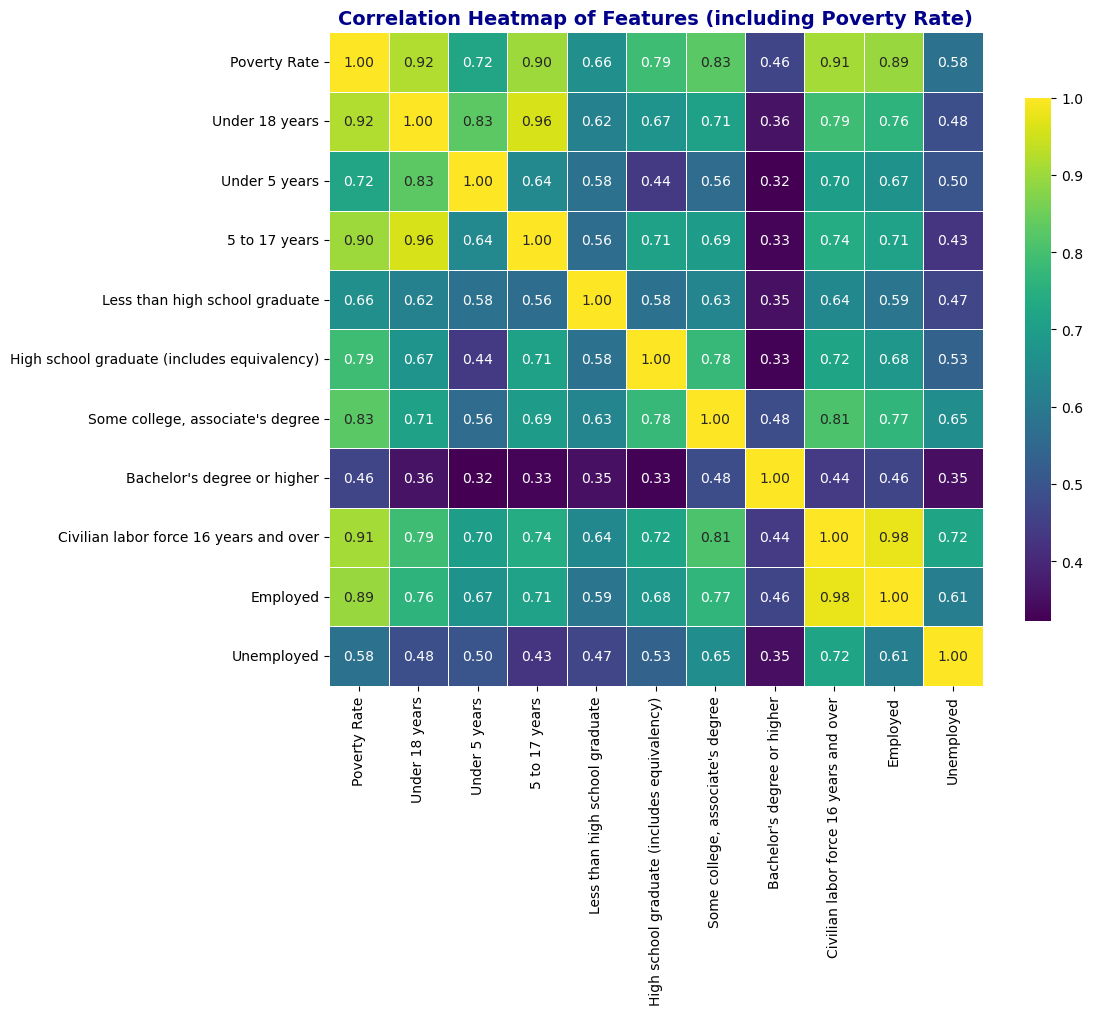

In [12]:
combined_acs =poverty_new.drop(['County','year'],axis=1)
combined_acs.rename(columns={'Population for whom poverty status is determined':'Poverty Rate'},inplace=True)

plt.figure(figsize = (12, 10))
corr = combined_acs.corr()
sns.heatmap(corr, cmap = 'viridis',annot = True,fmt = ".2f", square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.8}) #3
plt.title('Correlation Heatmap of Features (including Poverty Rate)', fontsize = 14, color = 'darkblue', fontweight = 'bold') #4
plt.tight_layout()
plt.show()



In [13]:
combined_acs.corr()['Poverty Rate'].sort_values(ascending=False)

Poverty Rate                                  1.00
Under 18 years                                0.92
Civilian labor force 16 years and over        0.91
5 to 17 years                                 0.90
Employed                                      0.89
Some college, associate's degree              0.83
High school graduate (includes equivalency)   0.79
Under 5 years                                 0.72
Less than high school graduate                0.66
Unemployed                                    0.58
Bachelor's degree or higher                   0.46
Name: Poverty Rate, dtype: float64

#### Combine three years COVID year data

In [14]:
pri[pri['year'] == 2020]['PRI']

# combine poverty rate data for all counties
pri_combined = pd.DataFrame({
    '2019': pri[pri['year'] == 2019]['PRI'],
    '2020': pri[pri['year'] == 2020]['PRI'],
    '2021': pri[pri['year'] == 2021]['PRI']
    })

pri_combined.head()

,2019,2020,2021
Statewide,0.70,0.80,0.84
Alameda,0.71,0.81,0.83
Alpine,0.58,0.50,0.67
Amador,0.57,0.62,0.72
Butte,0.78,0.64,0.69


### Visualize Poverty Rate data distribution 

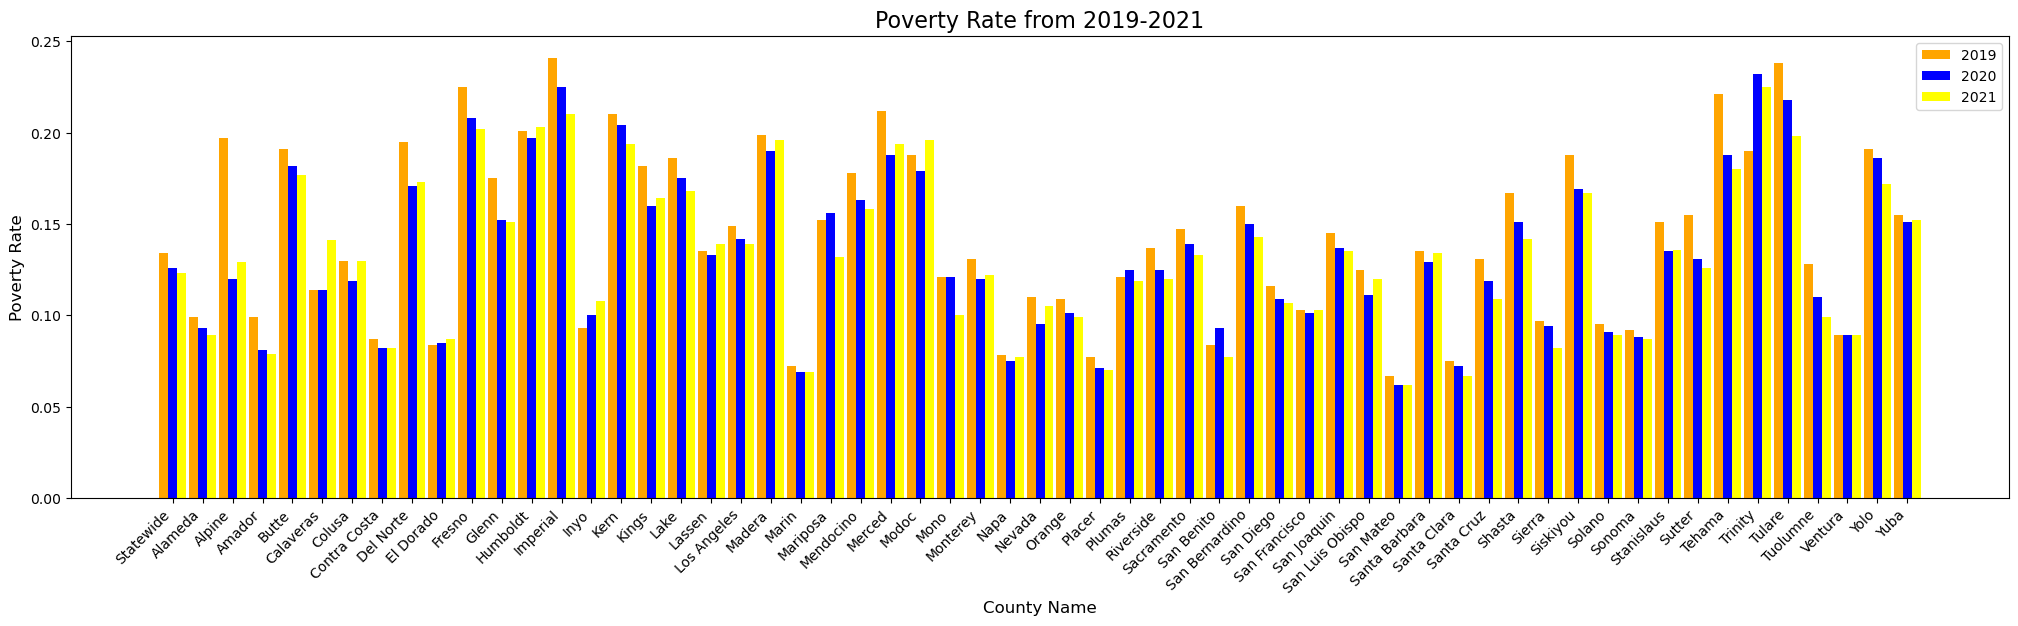

In [15]:
# combine poverty rate data for all counties
acs_combined = pd.DataFrame({
    '2019': acs2019.T['Population for whom poverty status is determined'],
    '2020': acs2020.T['Population for whom poverty status is determined'],
    '2021': acs2021.T['Population for whom poverty status is determined']
    })

# get number of counties
bar_num = np.arange(len(acs_combined)) * 2

# set the width of each bar
bar_width = 0.60

# create the grouped bar chart
plt.figure(figsize = (25, 6))
plt.bar(bar_num - 0.60, acs_combined['2019'], bar_width, label = '2019', color ='orange')
plt.bar(bar_num, acs_combined['2020'], bar_width, label = '2020', color ='blue')
plt.bar(bar_num + 0.60, acs_combined['2021'], bar_width, label = '2021', color ='yellow')
plt.xticks(bar_num, acs_combined.index, fontsize = 10, rotation = 45, ha = 'right')

# Add labels, title, and legend
plt.title('Poverty Rate from 2019-2021', fontsize=16)
plt.xlabel('County Name', fontsize=12)
plt.ylabel('Poverty Rate', fontsize=12)
plt.legend()

In [16]:
acs_combined

,2019,2020,2021
Statewide,0.13,0.13,0.12
Alameda,0.10,0.09,0.09
Alpine,0.20,0.12,0.13
Amador,0.10,0.08,0.08
Butte,0.19,0.18,0.18
Calaveras,0.11,0.11,0.14
Colusa,0.13,0.12,0.13
Contra Costa,0.09,0.08,0.08
Del Norte,0.20,0.17,0.17
El Dorado,0.08,0.09,0.09


Text(0.5, 1.0, 'California PRI')

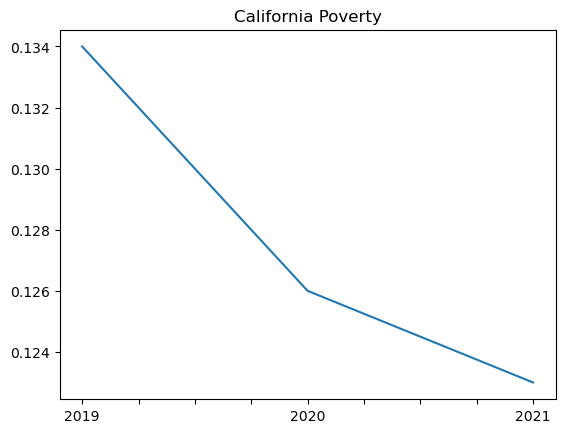

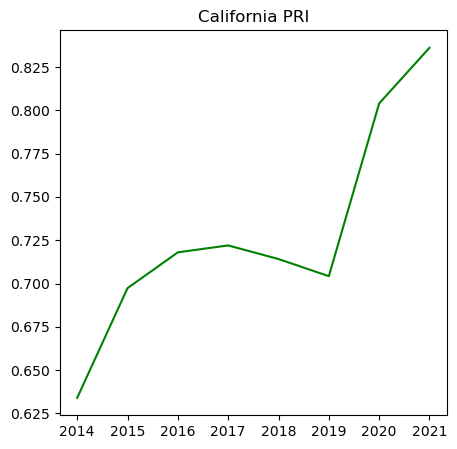

In [17]:
# create DF of california poverty from 2019-2021
CA_poverty_rate = pd.DataFrame({
    '2019': acs2019.loc[:, 'Statewide'],
    '2020': acs2020.loc[:, 'Statewide'],
    '2021': acs2021.loc[:, 'Statewide']
})

#plot the poverty rate
CA_poverty_rate.loc['Population for whom poverty status is determined'].plot()
plt.title('California Poverty')

#plot the PRI
CA_pri = pri.loc['Statewide', :]
plt.figure(figsize=(5, 5))
plt.plot(
    CA_pri["year"],
    CA_pri["PRI"]                                    
,color='g')
plt.title('California PRI')

In [18]:
# combine poverty rate data for all counties
pri_combined = pd.DataFrame({
    '2019': pri[pri['year'] == 2019]['PRI'],
    '2020': pri[pri['year'] == 2020]['PRI'],
    '2021': pri[pri['year'] == 2021]['PRI']
    })
pri_combined.head()


,2019,2020,2021
Statewide,0.70,0.80,0.84
Alameda,0.71,0.81,0.83
Alpine,0.58,0.50,0.67
Amador,0.57,0.62,0.72
Butte,0.78,0.64,0.69


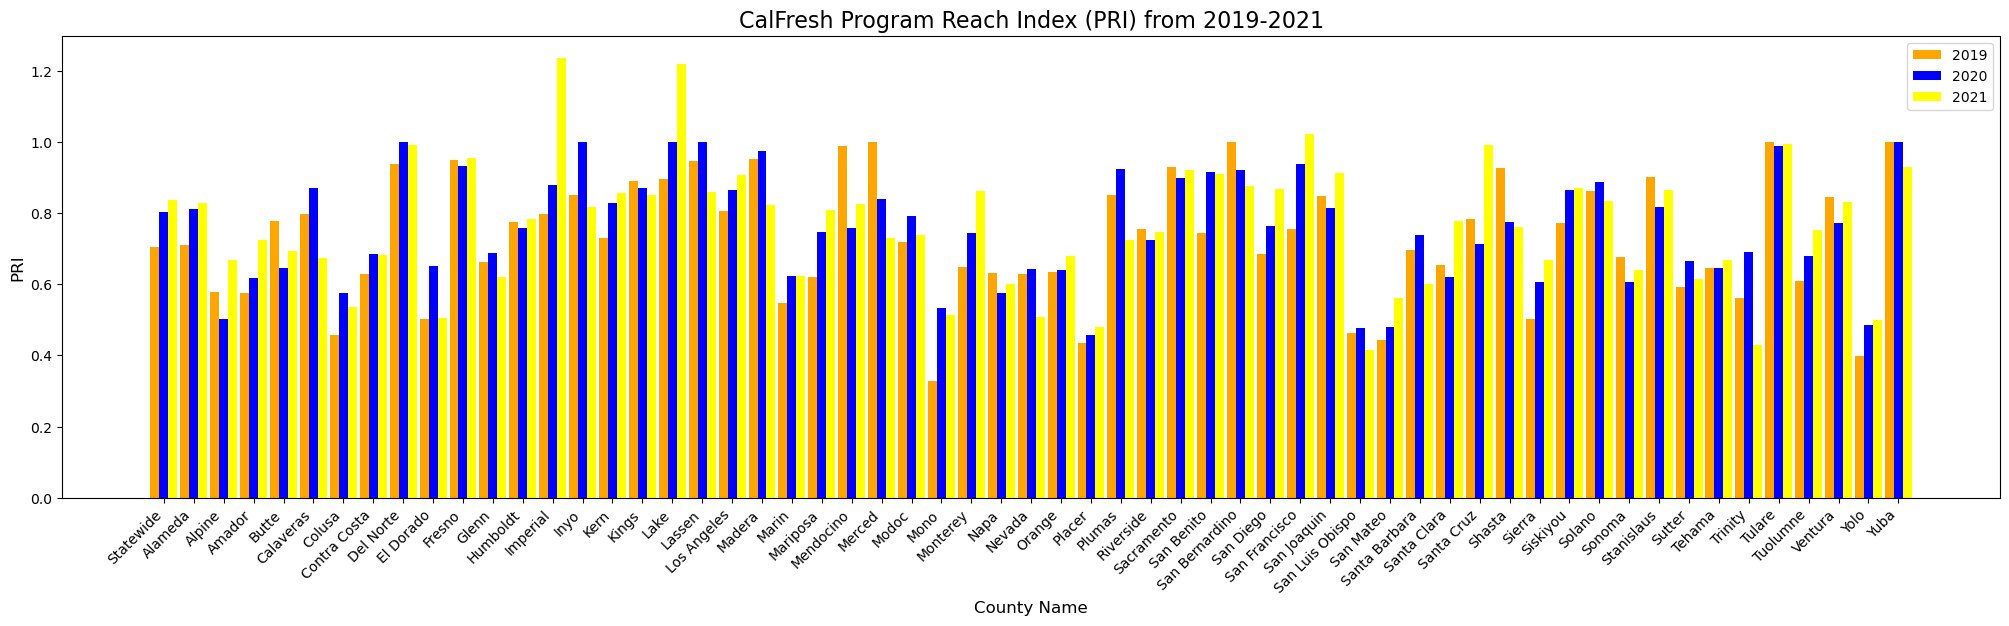

In [19]:
# combine poverty rate data for all counties
pri_combined = pd.DataFrame({
    '2019': pri[pri['year'] == 2019]['PRI'],
    '2020': pri[pri['year'] == 2020]['PRI'],
    '2021': pri[pri['year'] == 2021]['PRI']
    })

# get number of counties
bar_num = np.arange(len(pri_combined)) * 2

# set the width of each bar
bar_width = 0.60

# create the grouped bar chart
plt.figure(figsize = (25, 6))
plt.bar(bar_num - 0.60, pri_combined['2019'], bar_width, label = '2019', color ='orange')
plt.bar(bar_num, pri_combined['2020'], bar_width, label = '2020', color ='blue')
plt.bar(bar_num + 0.60, pri_combined['2021'], bar_width, label = '2021', color ='yellow')
plt.xticks(bar_num, pri_combined.index, fontsize = 10, rotation = 45, ha = 'right')

# Add labels, title, and legend
plt.title('CalFresh Program Reach Index (PRI) from 2019-2021', fontsize=16)
plt.xlabel('County Name', fontsize=12)
plt.ylabel('PRI', fontsize=12)
plt.legend()

In [20]:
# acs_combined = pd.DataFrame({
#     '2019': acs2019.T['Population for whom poverty status is determined'],
#     '2020': acs2020.T['Population for whom poverty status is determined'],
#     '2021': acs2021.T['Population for whom poverty status is determined']
#     })

# combine three year poverty data into one dataframe
poverty_new = pd.DataFrame({
    'County': pd.concat([
        acs2019.T.reset_index()['index'],
        acs2020.T.reset_index()['index'],
        acs2021.T.reset_index()['index']
    ]).values,
    'year': ['2019'] * 59 + ['2020'] * 59 + ['2021'] * 59,
    'Poverty Rate': pd.concat([
        acs2019.T['Population for whom poverty status is determined'],
        acs2020.T['Population for whom poverty status is determined'],
        acs2021.T['Population for whom poverty status is determined']
    ]).values,
    'Under 18 Years': pd.concat([
        acs2019.T['Under 18 years'],
        acs2020.T['Under 18 years'],
        acs2021.T['Under 18 years']
    ]).values,
    'Under 5 Years': pd.concat([
        acs2019.T['Under 5 years'],
        acs2020.T['Under 5 years'],
        acs2021.T['Under 5 years']
    ]).values,
    'Less than high school graduate': pd.concat([
        acs2019.T['Less than high school graduate'],
        acs2020.T['Less than high school graduate'],
        acs2021.T['Less than high school graduate']
    ]).values,
    'Unemployed': pd.concat([
        acs2019.T['Unemployed'],
        acs2020.T['Unemployed'],
        acs2021.T['Unemployed']
    ]).values,
})

# merge pri data into the dataframe
pri_data = pri[(pri['year'] == 2019) | (pri['year'] == 2020) | (pri['year'] == 2021)].rename_axis('County').reset_index()
pri_data['year'] = pri_data['year'].astype(str) #convert year to str to match type with poverty data
pri_poverty = pd.merge(poverty_new, pri_data, on=['County', 'year'], how='left')

pri_poverty.head()


,County,year,Poverty Rate,Under 18 Years,Under 5 Years,Less than high school graduate,Unemployed,PRI
0,Statewide,2019,0.13,0.18,0.19,0.22,0.28,0.70
1,Alameda,2019,0.10,0.11,0.11,0.19,0.25,0.71
2,Alpine,2019,0.20,0.27,0.48,0.46,0.59,0.58
3,Amador,2019,0.10,0.14,0.08,0.13,0.34,0.57
4,Butte,2019,0.19,0.20,0.22,0.25,0.39,0.78


### Aggregate all the combined data set to average out the Poverty Rate 

In [21]:
pri_poverty['PRI'] = pri_poverty['PRI'].astype('float')

# calculate state average 
avg_poverty = pri_poverty.groupby('County')['Poverty Rate'].mean()['Statewide']
avg_pri = pri_poverty.groupby('County')['PRI'].mean()['Statewide']


In [22]:
# calculate state average 
# avg_poverty = pri_poverty.groupby('County')['Poverty Rate'].mean()['Statewide']
# avg_pri = pri_poverty.groupby('County')['PRI Excludes SSI (SSI Removed From the Calculation)'].mean()['Statewide']

pri_poverty_summary = pri_poverty.groupby('County', as_index=False).agg({
    'Poverty Rate': 'mean',
    'PRI':'mean',
    'Under 18 Years': 'mean',
    'Under 5 Years': 'mean',
    'Less than high school graduate': 'mean',
    'Unemployed': 'mean'
})

pri_poverty_summary.columns = ['County', 'Average Poverty Rate', 'Average PRI','Avg Proportion of Under 18yo', 'Avg Proportion of Under 5yo', 'Avg Proportion of No HS Diploma', 'Avg Unemployed' ]

# Categorize counties based on CA average
def categorize(row):
    if row['Average PRI'] >= avg_pri and row['Average Poverty Rate'] <= avg_poverty:
        return "High PRI & Low Poverty (Potential Impact)"
    elif row['Average PRI'] < avg_pri and row['Average Poverty Rate'] > avg_poverty:
        return "Low PRI & High Poverty (Potential Target)"
    elif row['Average PRI'] >= avg_pri and row['Average Poverty Rate'] > avg_poverty:
        return "High PRI & High Poverty (No Impact)"
    else:
        return "Low PRI & Low Poverty (No Impact)"

pri_poverty_summary['Category'] = pri_poverty_summary.apply(categorize, axis=1)
pri_poverty_summary.head(10)

,County,Average Poverty Rate,Average PRI,Avg Proportion of Under 18yo,Avg Proportion of Under 5yo,Avg Proportion of No HS Diploma,Avg Unemployed,Category
0,Alameda,0.09,0.78,0.10,0.10,0.18,0.23,High PRI & Low Poverty (Potential Impact)
1,Alpine,0.15,0.58,0.21,0.30,0.40,0.51,Low PRI & High Poverty (Potential Target)
2,Amador,0.09,0.64,0.10,0.05,0.13,0.31,Low PRI & Low Poverty (No Impact)
3,Butte,0.18,0.71,0.19,0.21,0.25,0.39,Low PRI & High Poverty (Potential Target)
4,Calaveras,0.12,0.78,0.20,0.11,0.24,0.24,Low PRI & Low Poverty (No Impact)
5,Colusa,0.13,0.52,0.18,0.17,0.13,0.36,Low PRI & Low Poverty (No Impact)
6,Contra Costa,0.08,0.66,0.10,0.11,0.17,0.22,Low PRI & Low Poverty (No Impact)
7,Del Norte,0.18,0.98,0.24,0.18,0.23,0.22,High PRI & High Poverty (No Impact)
8,El Dorado,0.09,0.55,0.10,0.10,0.15,0.21,Low PRI & Low Poverty (No Impact)
9,Fresno,0.21,0.95,0.30,0.33,0.30,0.34,High PRI & High Poverty (No Impact)


Count of categories
Low PRI & Low Poverty (No Impact)            20
High PRI & High Poverty (No Impact)          19
Low PRI & High Poverty (Potential Target)    11
High PRI & Low Poverty (Potential Impact)     9
Name: Category, dtype: int64


,Average Poverty Rate,Average PRI,Avg Proportion of Under 18yo,Avg Proportion of Under 5yo,Avg Proportion of No HS Diploma,Avg Unemployed
Category,,,,,,
High PRI & High Poverty (No Impact),0.17,0.91,0.23,0.24,0.25,0.31
High PRI & Low Poverty (Potential Impact),0.10,0.84,0.13,0.13,0.18,0.24
Low PRI & High Poverty (Potential Target),0.17,0.65,0.21,0.24,0.27,0.35
Low PRI & Low Poverty (No Impact),0.10,0.62,0.12,0.12,0.18,0.23


<Figure size 500x500 with 0 Axes>

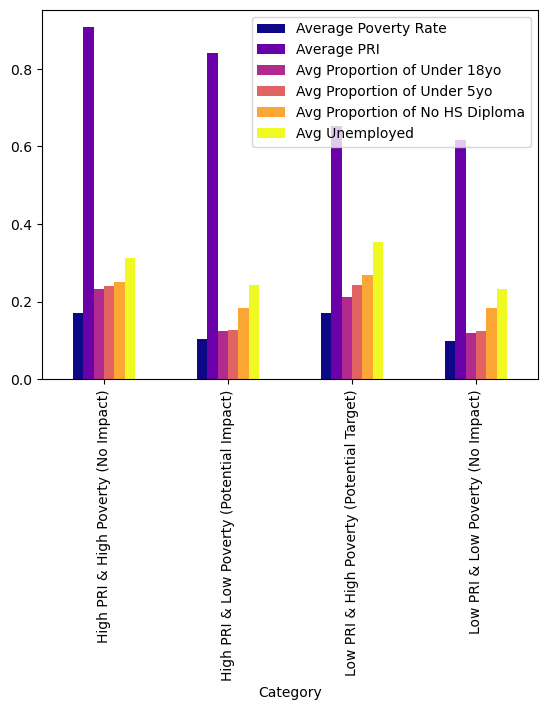

In [23]:
# Count the number of counties in each category
category_counts = pri_poverty_summary['Category'].value_counts()
print('Count of categories')
print(category_counts.head())

# Group by category and calculate averages
category_stats = pd.DataFrame(pri_poverty_summary.groupby('Category')[[
    'Average Poverty Rate', 
    'Average PRI', 
    'Avg Proportion of Under 18yo', 
    'Avg Proportion of Under 5yo', 
    'Avg Proportion of No HS Diploma', 
    'Avg Unemployed'
]].mean())
plt.figure(figsize=(5, 5))
category_stats.plot.bar(colormap='plasma')
category_stats.head()

In [24]:
# calculate state average 
# avg_poverty = pri_poverty.groupby('County')['Poverty Rate'].mean()['Statewide']
# avg_pri = pri_poverty.groupby('County')['PRI Excludes SSI (SSI Removed From the Calculation)'].mean()['Statewide']

pri_poverty_summary = pri_poverty.groupby('County', as_index=False).agg({
    'Poverty Rate': 'mean',
    'PRI':'mean',
    'Under 18 Years': 'mean',
    'Under 5 Years': 'mean',
    'Less than high school graduate': 'mean',
    'Unemployed': 'mean'
})

pri_poverty_summary.columns = ['County', 'Average Poverty Rate', 'Average PRI','Avg Proportion of Under 18yo', 'Avg Proportion of Under 5yo', 'Avg Proportion of No HS Diploma', 'Avg Unemployed' ]

# Categorize counties based on CA average
def categorize(row):
    if row['Average PRI'] >= avg_pri and row['Average Poverty Rate'] <= avg_poverty:
        return "High PRI & Low Poverty (Potential Impact)"
    elif row['Average PRI'] < avg_pri and row['Average Poverty Rate'] > avg_poverty:
        return "Low PRI & High Poverty (Potential Target)"
    elif row['Average PRI'] >= avg_pri and row['Average Poverty Rate'] > avg_poverty:
        return "High PRI & High Poverty (No Impact)"
    else:
        return "Low PRI & Low Poverty (No Impact)"

pri_poverty_summary['Category'] = pri_poverty_summary.apply(categorize, axis=1)
pri_poverty_summary.head(10)

,County,Average Poverty Rate,Average PRI,Avg Proportion of Under 18yo,Avg Proportion of Under 5yo,Avg Proportion of No HS Diploma,Avg Unemployed,Category
0,Alameda,0.09,0.78,0.10,0.10,0.18,0.23,High PRI & Low Poverty (Potential Impact)
1,Alpine,0.15,0.58,0.21,0.30,0.40,0.51,Low PRI & High Poverty (Potential Target)
2,Amador,0.09,0.64,0.10,0.05,0.13,0.31,Low PRI & Low Poverty (No Impact)
3,Butte,0.18,0.71,0.19,0.21,0.25,0.39,Low PRI & High Poverty (Potential Target)
4,Calaveras,0.12,0.78,0.20,0.11,0.24,0.24,Low PRI & Low Poverty (No Impact)
5,Colusa,0.13,0.52,0.18,0.17,0.13,0.36,Low PRI & Low Poverty (No Impact)
6,Contra Costa,0.08,0.66,0.10,0.11,0.17,0.22,Low PRI & Low Poverty (No Impact)
7,Del Norte,0.18,0.98,0.24,0.18,0.23,0.22,High PRI & High Poverty (No Impact)
8,El Dorado,0.09,0.55,0.10,0.10,0.15,0.21,Low PRI & Low Poverty (No Impact)
9,Fresno,0.21,0.95,0.30,0.33,0.30,0.34,High PRI & High Poverty (No Impact)


##### The Poverty Data is saved as csv file to review & experiement with various models. Hence its loaded again in the below cell.

In [25]:
# Removing statewide data. We need only county wise data for our analysis 
pri_poverty_summary = pri_poverty_summary[pri_poverty_summary['County'] != 'Statewide']

In [26]:
# Save the DataFrame to a CSV file
pri_poverty_summary.to_csv('pri_poverty_summary.csv', index=False)

In [27]:
pri_poverty_summary.columns

Index(['County', 'Average Poverty Rate', 'Average PRI',
       'Avg Proportion of Under 18yo', 'Avg Proportion of Under 5yo',
       'Avg Proportion of No HS Diploma', 'Avg Unemployed', 'Category'],
      dtype='object')

In [28]:
# final_withoutyear =pri_poverty_summary.drop(['County','Category'],axis=1)
# plt.figure(figsize = (5,5))
# corr = final_withoutyear.corr()
# sns.heatmap(corr, cmap = 'viridis')


#### From the above Correlation, At first glace it seems like the Avergae Poverty is co-related to PRI. We will review if this is the case after evaluating the model.

# Model Building Starts here

In [29]:
# Re-read the data from CSV file stored above
# Assign X [features] & y [target]
def prepare_data():
     # ----------------------------
    # Load your original dataset
    # ----------------------------
    df = pd.read_csv("pri_poverty_summary.csv")

    # ----------------------------
    # Prepare X and y
    # ----------------------------
    X = df.drop(['County', 'Average Poverty Rate', 'Category'], axis=1)
    y = df['Average Poverty Rate'].values    

    return X,y

## Load Data and Calculate Baseline model

In [30]:


# Assuming you have X_train and y_train ready
# X_train should be your feature DataFrame
# y_train should be your target DataFrame
    
print("Loading Data  & Preparing Train and val dataset")
print("=" * 60) 

X,y = prepare_data()
print("Priting the shape of the features :",X.shape)
print("Printing the shape of Target :",y.shape)

#Baseline model
#Create a prediction using mean poverty rate
Y_pred = [y.mean()] * len(X)
baseline_mse = mean_squared_error(y, Y_pred) # compute baseline

print(f'Baseline MSE: {baseline_mse:.5f}')

Loading Data  & Preparing Train and val dataset
Priting the shape of the features : (58, 5)
Printing the shape of Target : (58,)
Baseline MSE: 0.00192


## Build Model 

### Building Random Forest Model using K-fold technique. Our dataset is small i.e. 59 rows

In [31]:

def kfold_random_forest(X, y,baseline_mse, k=5, n_estimators=100, max_depth=10):
    """
    Simple Random Forest with K-Fold validation
    Target: Beat baseline MSE of 0.00189
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=1234)
    val_mses = []
    fold_predictions = [] 
    #improvemnts  
    print(f"Random Forest - {k}-Fold Cross Validation")
    print("-" * 50)
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        # Split the data
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Create and train model
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42,
            n_jobs=-1
        )
        
        model.fit(X_train, y_train)
        
        # Predict and calculate MSE
        y_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_pred)
        val_mses.append(val_mse)
        # Store predictions for plotting
        fold_predictions.extend(list(zip(y_val, y_pred)))
        print(f'Fold {fold+1} Val MSE: {val_mse:.6f}')
    
    avg_mse = np.mean(val_mses)
    std_mse = np.std(val_mses)
    
    
    print("-" * 50)
    print(f'Average MSE: {avg_mse:.6f} (±{std_mse:.6f})')
    print(f'Baseline MSE: {baseline_mse:.6f}')
    
    if avg_mse < baseline_mse:
        improvement = ((baseline_mse - avg_mse) / baseline_mse) * 100
        print(f'Improvement Achieved [ Avg MSE is < Baseline MSE]: {improvement:.2f}%')
    else:
        print('Did not beat baseline')
    
    return avg_mse, val_mses, model,fold_predictions

### Prepare Train & Val split and Run Random Forest Model
#### Review the model performance against Baseline

In [32]:
# Prepare Training , Val split 
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=1234
)

print("Running Random Forest Model using K-fold cross validation")
print("=" * 60)
# We will keep the k-fold small
avg_mse, val_mses,model,fold_predictions = kfold_random_forest(X_train, y_train,baseline_mse, k=5)

# Summarising the K-fold result
print(f"\n" + "=" * 70)
print("FOLD-BY-FOLD RESULTS WITH ANALYSIS:")
print("=" * 70)

# Calculate the best and worst MSE
best_mse = min(val_mses)
worst_mse = max(val_mses) 


for i, score in enumerate(val_mses):
				fold_num = i
				mse = score
				
				improvement = ((baseline_mse - mse) / baseline_mse) * 100 
				# Determine status
				status_parts = []
	
				if mse == best_mse:
								status_parts.append("Best fold")
				if mse == worst_mse:
								status_parts.append("Worst fold")
				if improvement >= 85:
								status_parts.append("Excellent!")
				elif improvement >= 75:
								status_parts.append("Very good")
				elif improvement >= 60:
								status_parts.append("Good")
				
				# Format status
				status = " ← " + ", ".join(status_parts) if status_parts else ""
				
				print(f'Fold {fold_num} Val MSE: {mse:.6f} ({improvement:.0f}% better than baseline){status}')

model_name = "Random Forest"

#fdor name, mse in sorted(results, key=lambda x: x[1]):
status = f"{model_name} BEATS BASELINE" if avg_mse < baseline_mse else f"{model_name} is Below baseline"
print(f"{model_name:20} AVG MSE: {avg_mse:.6f} - {status}")

# TRAIN FINAL MODEL
print(f"\n2. FINAL MODEL TRAINING:")
print("-" * 40)

final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

Running Random Forest Model using K-fold cross validation
Random Forest - 5-Fold Cross Validation
--------------------------------------------------
Fold 1 Val MSE: 0.000516
Fold 2 Val MSE: 0.000201
Fold 3 Val MSE: 0.000640
Fold 4 Val MSE: 0.000758
Fold 5 Val MSE: 0.000305
--------------------------------------------------
Average MSE: 0.000484 (±0.000206)
Baseline MSE: 0.001924
Improvement Achieved [ Avg MSE is < Baseline MSE]: 74.85%

FOLD-BY-FOLD RESULTS WITH ANALYSIS:
Fold 0 Val MSE: 0.000516 (73% better than baseline) ← Good
Fold 1 Val MSE: 0.000201 (90% better than baseline) ← Best fold, Excellent!
Fold 2 Val MSE: 0.000640 (67% better than baseline) ← Good
Fold 3 Val MSE: 0.000758 (61% better than baseline) ← Worst fold, Good
Fold 4 Val MSE: 0.000305 (84% better than baseline) ← Very good
Random Forest        AVG MSE: 0.000484 - Random Forest BEATS BASELINE

2. FINAL MODEL TRAINING:
----------------------------------------


RandomForestRegressor(n_jobs=-1, random_state=42)

## Model Evaluation

In [33]:

print(f"\n Starting Model Evaluation:")
print("-" * 40)


# Training predictions
y_train_pred = final_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test predictions
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training Metrics:")
print("*" * 20)
print(f"  MSE: {train_mse:.6f}")
print(f"  R²:  {train_r2:.4f}")
print(f"  MAE: {train_mae:.6f}")

print(f"Test Metrics:")
print("*" * 20)
print(f"  MSE: {test_mse:.6f}")
print(f"  R²:  {test_r2:.4f}")
print(f"  MAE: {test_mae:.6f}")

test_improvement = ((baseline_mse - test_mse) / baseline_mse) * 100
print(f"Test Improvement over baseline: {test_improvement:.1f}%")


 Starting Model Evaluation:
----------------------------------------
Training Metrics:
********************
  MSE: 0.000066
  R²:  0.9673
  MAE: 0.005868
Test Metrics:
********************
  MSE: 0.000090
  R²:  0.9063
  MAE: 0.007861
Test Improvement over baseline: 95.3%


### Visualisation of the Result using various plot


 Visualize the Result
------------------------------


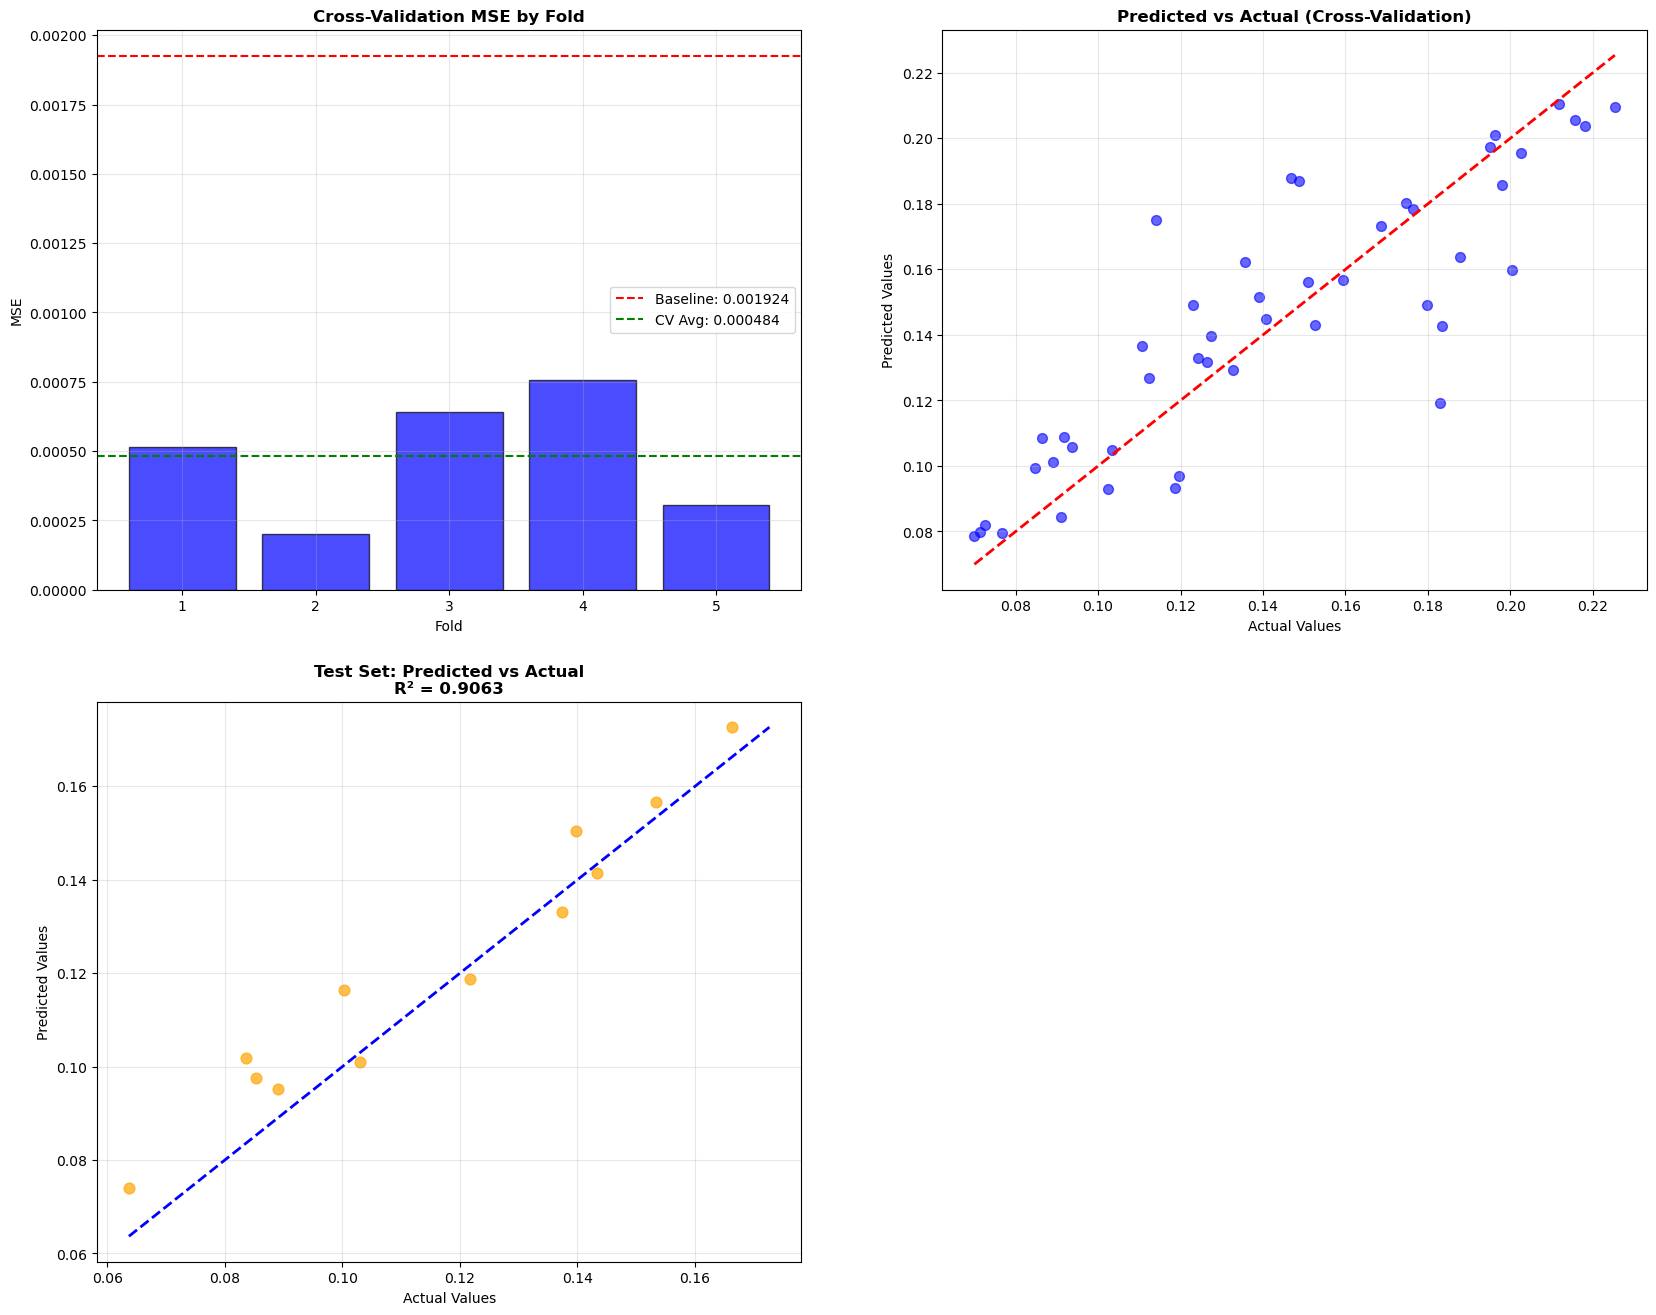

In [34]:
# Start generating plots
print(f"\n Visualize the Result")
print("-" * 30)
fig = plt.figure(figsize=(20, 16))

# Cross-Validation Score Plot
ax1 = plt.subplot(2, 2, 1)
folds = range(1, 6)
plt.bar(folds, val_mses, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(y=baseline_mse, color='red', linestyle='--', label=f'Baseline: {baseline_mse:.6f}')
plt.axhline(y=avg_mse, color='green', linestyle='--', label=f'CV Avg: {avg_mse:.6f}')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Cross-Validation MSE by Fold',weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Predicted vs Actual [ Cross Validation] Plot
ax2 = plt.subplot(2, 2, 2)
cv_actual, cv_predicted = zip(*fold_predictions)
plt.scatter(cv_actual, cv_predicted, alpha=0.6, s=50,color='blue')
min_val = min(min(cv_actual), min(cv_predicted))
max_val = max(max(cv_actual), max(cv_predicted))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual (Cross-Validation)',weight='bold')
plt.grid(True, alpha=0.3)




# Test Set - Predicted vs Actual Plot
ax7 = plt.subplot(2, 2, 3)
plt.scatter(y_test, y_test_pred, alpha=0.7, s=60, c='orange')
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2,color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_r2:.4f}',weight='bold')
plt.grid(True, alpha=0.3)



    

### Feature Importance gained from Random Forest Best K-Fold Model 


 Most important Features as per the model :
----------------------------------------
Top 10 Most Important Features:
                           Feature  Importance
1     Avg Proportion of Under 18yo        0.63
2      Avg Proportion of Under 5yo        0.26
3  Avg Proportion of No HS Diploma        0.05
4                   Avg Unemployed        0.04
0                      Average PRI        0.02


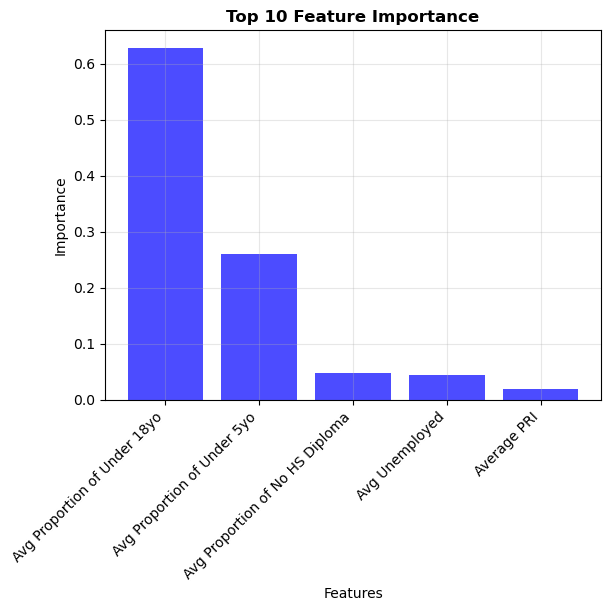

In [35]:
print(f"\n Most important Features as per the model :")
print("-" * 40)

importance_df = pd.DataFrame({
				'Feature': X.columns,
				'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("=" * 40) 
print("Top 10 Most Important Features:")
print("=" * 40)
print(importance_df.head(10).round(4))

# Feature Importance Plot

feature_importance = final_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[::-1][:10]  # Top 10 features

plt.bar(range(len(indices)), feature_importance[indices], alpha=0.7,color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance',weight='bold')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.grid(True, alpha=0.3)